
# Machine Learning Internship task

Welcome folks, Thank you for applying for this internship and we are super excited to take this conversation ahead with you.

But before we go ahead, we would like you to go thru a small assessment, which will help us to evaluate you better on technical skills and working styles.


## Task Objective :
* [ ] Perform EDA on the given [data](https://github.com/geniusai-research/interns_task/blob/main/taskdata.csv).
* [ ] Build some new features which makes sense for the learning objective.
* [ ] Train any classifier (can be any model of your choice XGB,DNNs, etc) 
* [ ] Implement SHAP on this model to explain the decisions. (`Bonus points`) 
* [ ] Submit the task by creating a PR request on this [repository](https://github.com/geniusai-research/interns_task/).

## Instructions :
* Perform all the tasks mentioned above.
* Maintain a single **JupyterNotebook** which has all the descriptions and code in it. 
* Notebook needs to be properly structured .
* Code needs to reproducible.

**We will only accept the assignment if its in a single Notebook or else it will be rejected.**

## Important dates
The assignments needs to be completed in 1 week from today. <br>
**Deadline : 28th October**


If you have any issue then feel free to create issue on this [repository](https://github.com/geniusai-research/interns_task/) or reachout to us over the internshala chat.

<hr>

Cheers!!!  <br>
RK 


## Task Submission by Tanmaya Kumar Sahni



Let us first load in the data and have a look at it

In [1]:
import pandas as pd

df = pd.read_csv('taskdata.csv')
df.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1



Information below regarding the columns has been provided in the file data_description.md 


## Metadata for the columns.

**max_return_days**: Maximum number of days in which user made a re-purchase

**average_return_days**: Average number of days in which user made a purchase

**customer_since_months** : No of months since user started paying

**total_revenue**: Total revenue made from this user

**average_revenue**: Average revenue made from this user

**avg_vas_count**: Average amount of vas counts

**avg_used_vas_value**: Average number of vas used by the user

**business_type**: Business type

**avg_wallet_bonus**: Average bonus amount in wallet

**avg_active_ads**: Average no of active ads

**avg_new_ads**: Average no of new ads

**avg_email_replies**: Average no of email replies

**avg_call_replies**: Average no of call replies

**avg_sms_replies**: Average no of sms replies

**target**: If user stays or leaves



So we have to train a model to find out whether a user stays or leaves based on the given data




## Exploratory Data Analysis


Let us gather some information about the Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

There are 4407 entries in the dataset. It looks like the column **account_id** has some of the values missing

Since the number of missing values is not very large, 7/4407 which 0.15% of the data, we can simply remove them

In [3]:
data_clean = df[df['account_id'].isnull()==False]

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4400 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4400 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4400 non-null   int64  
 3   average_return_days    4400 non-null   float64
 4   customer_since_months  4400 non-null   int64  
 5   total_revenue          4400 non-null   float64
 6   average_revenue        4400 non-null   float64
 7   avg_vas_count          4400 non-null   float64
 8   avg_used_vas_value     4400 non-null   float64
 9   business_type          4400 non-null   int64  
 10  avg_wallet_bonus       4400 non-null   float64
 11  avg_active_ads         4400 non-null   float64
 12  avg_new_ads            4400 non-null   float64
 13  avg_email_replies      4400 non-null   float64
 14  avg_call_replies       4400 non-null   float64
 15  avg_

Now let us look at some stats regarding the columns

In [4]:
data_clean.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.400000e+03,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,4.106191e+09,506.553864,22.362500,7.174561,9.884545,194.439208,16.969570,3.253853,72.217150,0.496591,339.299218,98.992841,16.768863,25.711065,27.655640,0.162266,0.103182
std,6.798984e+09,326.072756,43.618703,19.219665,5.163509,1549.573607,128.369056,5.512943,117.082250,1.198236,832.312947,297.898133,67.975094,55.361244,61.110202,0.518064,0.304231
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184590e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.153846,2.964286,0.000000,0.000000,13.538462,2.500000,4.490385,4.412500,0.000000,0.000000
50%,7.293982e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,41.500000,40.000000,6.333333,12.307692,13.000000,0.000000,0.000000
75%,7.292738e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.358766,100.000000,0.000000,328.275000,101.333333,14.250000,28.000000,30.804545,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


From table, we can infer the following:

1. It seems that various values of **account_id** are being repeated since it ranges from 111 to 1017 for 4400 entries. This is important since IDs are usually used to uniquely identify the entries.

2. Many of the columns seem to contain some very high values which may be outliers.

3. Only 10.31% of the column **target** have the value **target** = 1. This is the Label that we will classify the data into. This makes the dataset Unbalanced. We are going to assume that **target** = 0 means the user stayed and for **target** = 1 the user left 




Let us first investigate the first point:

In [5]:
columns = data_clean.columns

for col in columns:
    print('Number of Unique values for ',col,' : ',len(data_clean[col].unique()))

Number of Unique values for  user_id  :  4400
Number of Unique values for  account_id  :  15
Number of Unique values for  max_return_days  :  229
Number of Unique values for  average_return_days  :  917
Number of Unique values for  customer_since_months  :  23
Number of Unique values for  total_revenue  :  434
Number of Unique values for  average_revenue  :  510
Number of Unique values for  avg_vas_count  :  677
Number of Unique values for  avg_used_vas_value  :  1027
Number of Unique values for  business_type  :  6
Number of Unique values for  avg_wallet_bonus  :  989
Number of Unique values for  avg_active_ads  :  2755
Number of Unique values for  avg_new_ads  :  1421
Number of Unique values for  avg_email_replies  :  1900
Number of Unique values for  avg_call_replies  :  1932
Number of Unique values for  avg_sms_replies  :  140
Number of Unique values for  target  :  2


From the above data we can see that while **user_id** uniquely identifies each row, there are only 15 values of **account_id** among the various rows.

Since **account_id** does not represent either Numerical or Ordinal information, it should be considered  a Categorical column. Similarly, the column **bussiness_type** should be considered Categorical 

In [6]:
data_clean = data_clean.astype({'business_type':'str','account_id':'str'}) 
## converting them to str type as they are Categorical

**Note :-** The above step does not make a difference in this case, as later we will be using Tree based algorithms which treat both Categorical and Numerical data in similar ways. For other algorithms, we would have to encode the data with LabelEncoding or OneHotEncoding     

Now let us look at how mant users left.

In [7]:
data_clean.target.value_counts()

0    3946
1     454
Name: target, dtype: int64

So out of 4400 users, 454 left while the 3946 remained

Before looking at the outliers, let us check for correlation between the columns.

Correlations between different columns will help us better understand the relationship between columns. This will be very important in feature engineering and feature selection. This will also help us better understand the machine learning model that we will train.  

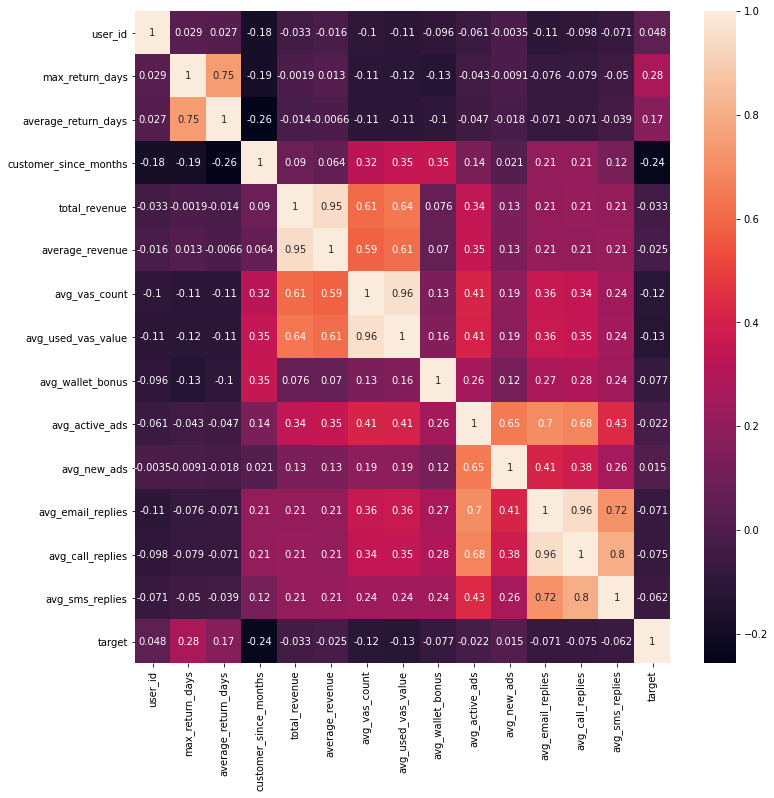

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))
sns.heatmap(data_clean.corr(),annot=True)

Some observations from the above correlation matrix 

1. The Columns **max_return_days** and **average_return_days** are correlated. This is to be expected since one is partially dependant on the other.

2. Similarly the Columns **total_revenue** and **average_revenue** are highly correlated.

3. Similarly the Columns **avg_vas_count** and **avg_used_vas_value** are highly correlated.

4. The Columns **avg_active_ads** and **avg_new_ads** have some correlation.

5. The Columns **avg_email_replies**, **avg_call_replies** and **avg_sms_replies** have high correlation.


But there are some more interesting things if we look closely

1. **max_return_days** has a week positive correlation with **target**.

2. Similarly **customer_since_months** has a week negative correlation with **target**.

3. Many of the variables have some correlation with **customer_since_months** and **avg_used_vas_value**.


These observations can be very useful in feature selection and feature engineering. 


***Identifying Outliers***

It is really important to correctly handle outliers. Sometimes Outliers might actually be very important in determining the Label. This may be even more important in Unbalanced datasets like the one we have.

While looking for outliers, we should look at how these values affect **target**, which is the Label.


Now we will check how many outliers exist for each of the the Numerical columns, we will be using IQR (Inter Quartile Range) to identify them.  

In [9]:
num_columns = ['max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies']

print('Number of IQR outliers for each column')
for col in num_columns:
    
    iqr = data_clean[col].quantile(0.75) - data_clean[col].quantile(0.25) 
    upper_cutoff = data_clean[col].quantile(0.75) + iqr*1.5
    print(col,' : ',len(data_clean[data_clean[col] > upper_cutoff]))

Number of IQR outliers for each column
max_return_days  :  375
average_return_days  :  595
customer_since_months  :  0
total_revenue  :  572
average_revenue  :  572
avg_vas_count  :  213
avg_used_vas_value  :  196
avg_wallet_bonus  :  482
avg_active_ads  :  345
avg_new_ads  :  396
avg_email_replies  :  358
avg_call_replies  :  351
avg_sms_replies  :  449


We find that there is a very large number IQR Outliers. We can not get rid of such a large number of entries. 

Let us look at each of these individually in detail. For this we will be using the distribution plot from seaborn. Boxplots can also be used.

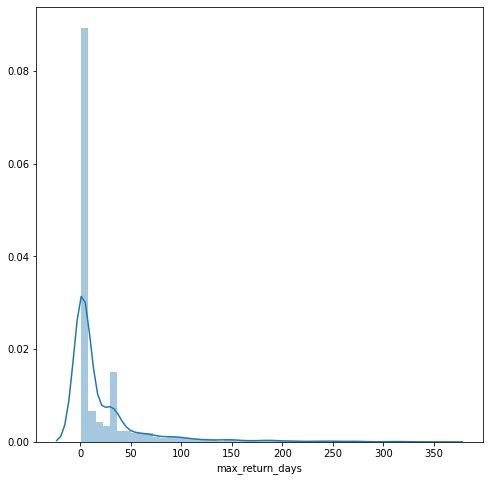

In [10]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['max_return_days'])

We find that Graph for **max_return_days** is highly skewed to the left and then slowly tapers off to the right.
It seems that at around a value of 150, the frequency of values becomes very less. Let us check how these values interact with **target**

In [11]:
m = data_clean[data_clean['max_return_days'] > 150]
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  128
targets = 1 : 70


A very disproportionate number of entries (70/128) with **max_return_days** > 150 are have **target** = 1, which means they leave. This means these entries have significant impact on whether the user stays or leaves

Since we can not remove outliers for **max_return_days**, we can also not remove outliers for **average_return_days**

Let us look at other variables

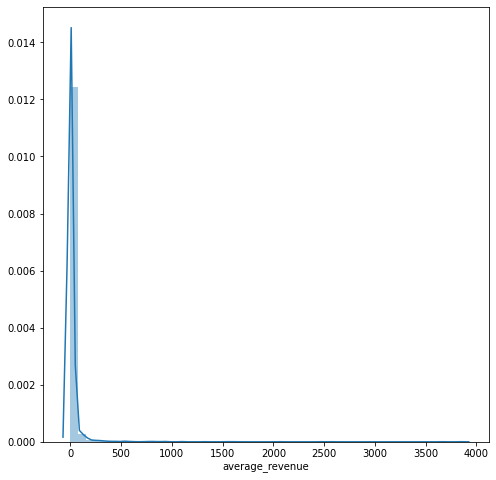

In [12]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['average_revenue'])

In [13]:
m = data_clean[data_clean['average_revenue'] > 250] ## Highly correlated to total_revenue
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  58
targets = 1 : 3


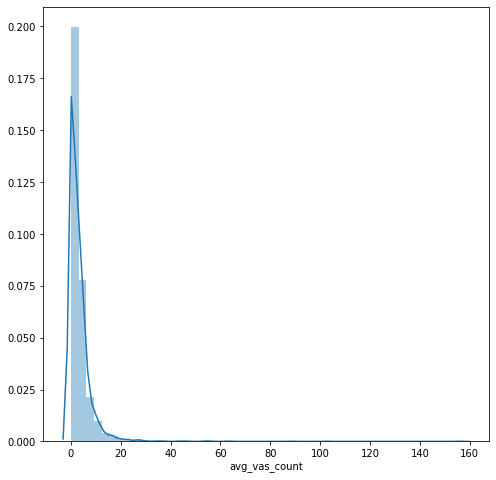

In [14]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['avg_vas_count'])

In [15]:
m = data_clean[data_clean['avg_vas_count'] > 30] ## Highly correlated to to avg_used_vas_value
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  19
targets = 1 : 0


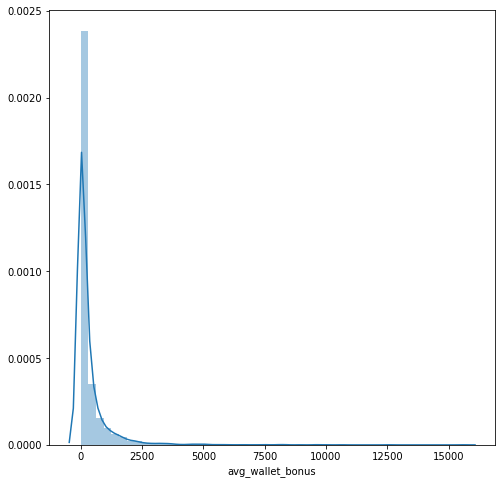

In [16]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['avg_wallet_bonus'])

In [17]:
m = data_clean[data_clean['avg_wallet_bonus'] > 2000]
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  138
targets = 1 : 5


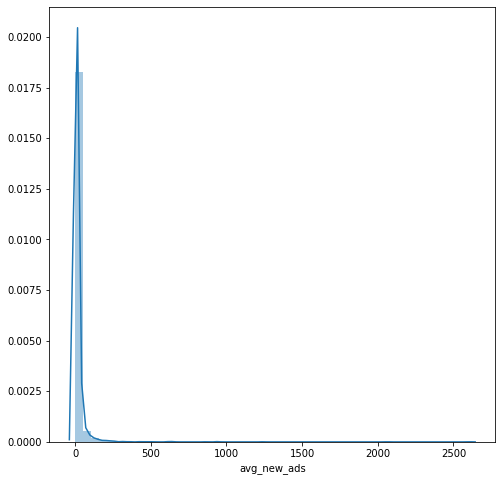

In [18]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['avg_new_ads'])

In [19]:
m = data_clean[data_clean['avg_new_ads'] > 200] ## Highly correlated to to avg_active_ads
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  35
targets = 1 : 4


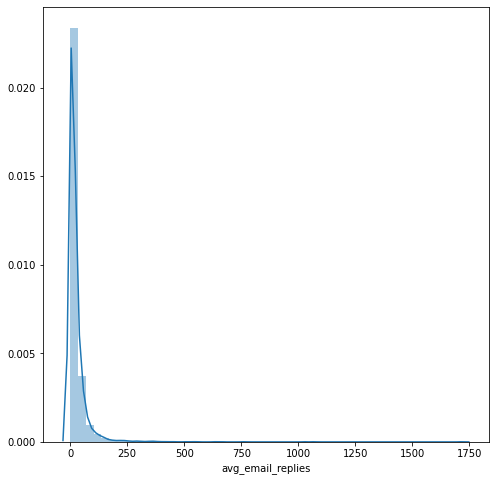

In [20]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['avg_email_replies'])

In [21]:
m = data_clean[data_clean['avg_email_replies'] > 200] 
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  52
targets = 1 : 3


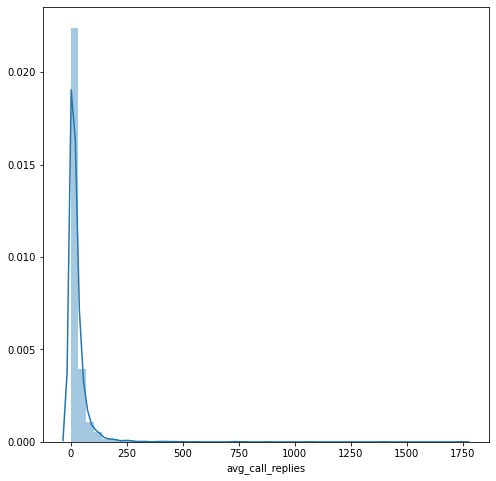

In [22]:
plt.figure(figsize=(8, 8))
sns.distplot(data_clean['avg_call_replies'])

In [23]:
## although avg_email_replies and avg_call_replies are highly correlated, there were still many entries with a high value for avg_call_replies

m = data_clean[data_clean['avg_call_replies'] > 250] 
print('size = ',len(m))
print('targets = 1 :',len(m[m['target']==1]))

size =  36
targets = 1 : 2


Now let us decide which outliers to remove:

For **average_revenue**, 3 of the 58 outliers had left, this does seem to be lower than expected, but we can not say for certain

For **avg_vas_count**, none of the 19 outliers had left, but since the there number is very less, we can remove them

For **avg_wallet_bonus**, 5 of the 138 outliers had left, this does seem to be lower than expected, but we can not say for certain

For **avg_new_ads**, 4 of the 35 outliers had left, which is close to what is expected, hence they do not seem to have a large impact

For **avg_email_replies**, 3 of the 52 outliers had left, which is close to what is expected, hence they do not seem to have a large impact

For **avg_call_replies**, 2 of the 36 outliers had left, which is close to what is expected, hence they do not seem to have a large impact



Based on these observations, we are going to remove some of the outliers

In [24]:
data_clean = data_clean[data_clean['average_revenue'] < 250]
data_clean = data_clean[data_clean['avg_vas_count'] < 30]
data_clean = data_clean[data_clean['avg_wallet_bonus'] < 2000]
data_clean = data_clean[data_clean['avg_new_ads'] < 200]
data_clean = data_clean[data_clean['avg_email_replies'] < 200]
data_clean = data_clean[data_clean['avg_call_replies'] < 250]

Now let us look at our data again 

In [25]:
data_clean.describe()

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000
mean,4.202303e+09,23.022842,7.403904,9.694879,75.184126,6.656591,2.858424,63.476549,222.014931,72.056345,11.679248,20.117444,21.721198,0.121477,0.106035
std,6.854673e+09,44.197061,19.665131,5.138716,302.737950,25.459081,3.374389,74.830807,371.308550,109.939384,18.878916,25.009775,27.773673,0.256727,0.307920
min,4.100390e+05,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.211540e+08,1.000000,1.000000,5.000000,0.000000,0.000000,0.111111,2.307692,0.000000,12.928205,2.428571,4.133929,4.000000,0.000000,0.000000
50%,7.335224e+08,2.000000,1.142857,11.000000,0.000000,0.000000,2.000000,43.333333,20.000000,37.500000,6.000000,11.500000,12.090909,0.000000,0.000000
75%,7.295835e+09,31.000000,6.000000,14.000000,0.000000,0.000000,4.230769,98.257576,300.000000,92.080128,13.080128,25.884615,28.250000,0.153846,0.000000
max,7.356031e+10,354.000000,354.000000,24.000000,3828.331200,236.311429,27.615385,720.000000,1992.000000,1788.181818,199.500000,193.384615,242.230769,4.500000,1.000000


We are now left with 4159 rows after removing the outliers.

We had seen weak correlation of **target** with **max_return_days** and **customer_since_months**, let us take a closer look

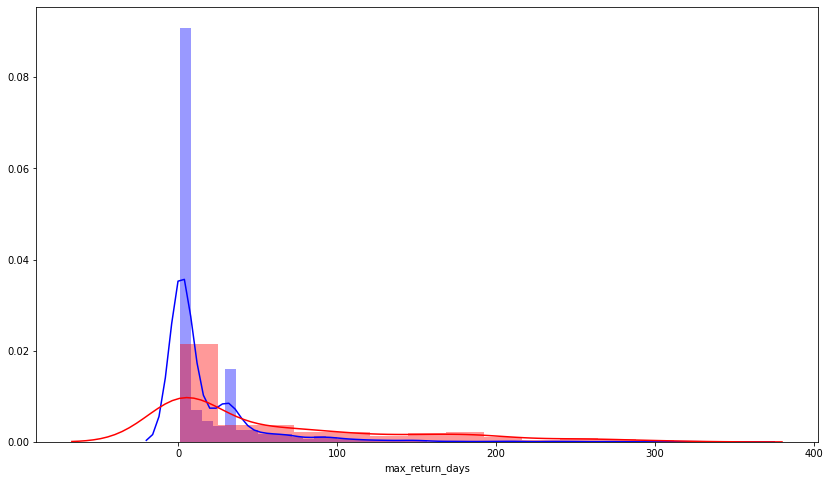

In [26]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['max_return_days'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['max_return_days'],color = 'red')

While it is not very clear for lower values of **max_return_days**, for higher values, say 50+ it seems that the likelyhood of leaving increases. 

**Note:-** These do not reflect the number instances of each category, but rather the proportional distribution of each category.  


Now let us look at **customer_since_months**

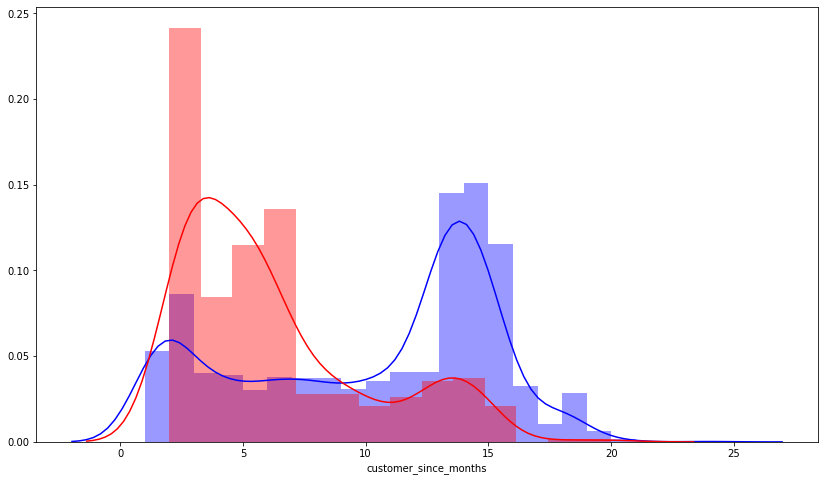

In [27]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['customer_since_months'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['customer_since_months'],color = 'red')

The trend in this graph is very clear, most of the instances where users left are concentrated around lower values of **customer_since_months**. As the value of **customer_since_months** increases, the likelyhood of leaving decreases.  

This is very useful information, let us try to find similar trends for other columns

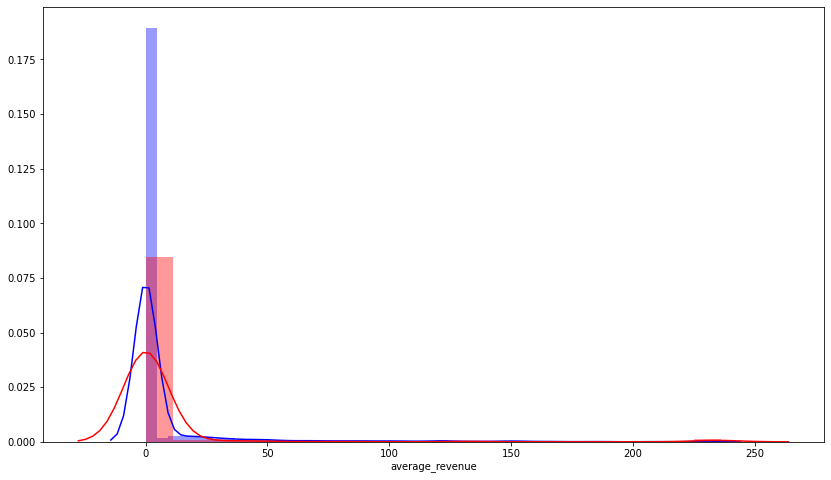

In [28]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['average_revenue'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['average_revenue'],color = 'red')
## correlated to total_revenue

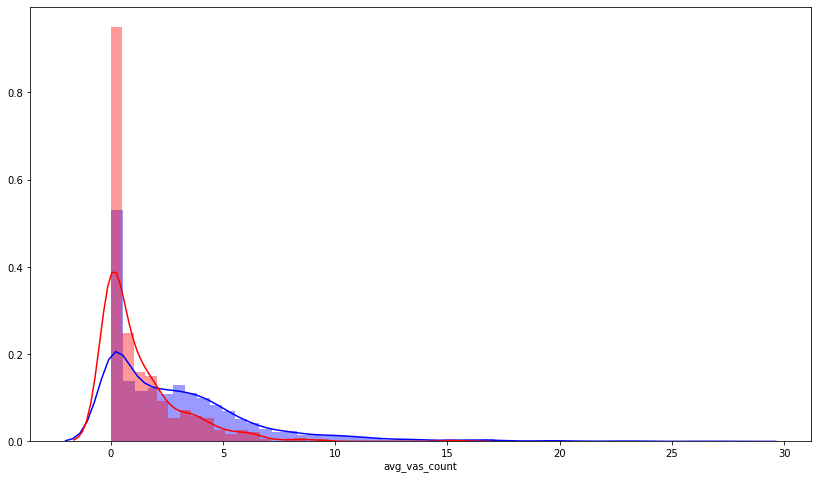

In [29]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['avg_vas_count'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['avg_vas_count'],color = 'red')
## correlated to avg_used_vas_value

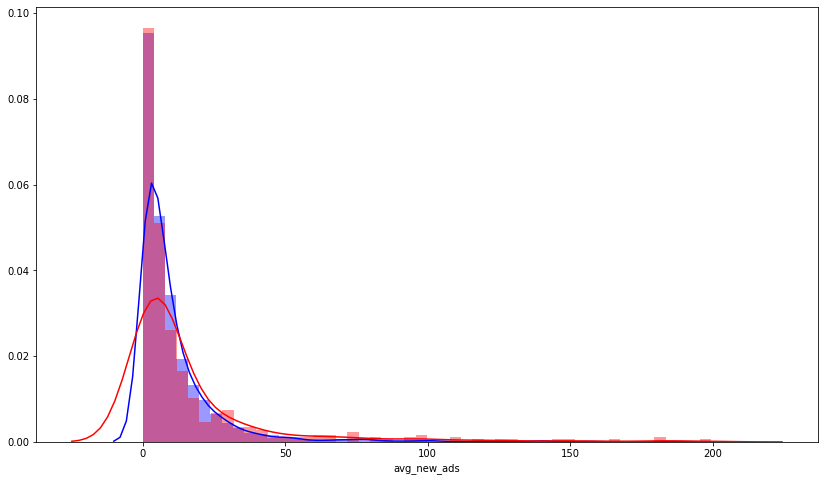

In [30]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['avg_new_ads'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['avg_new_ads'],color = 'red')
## correlated to avg_active_ads

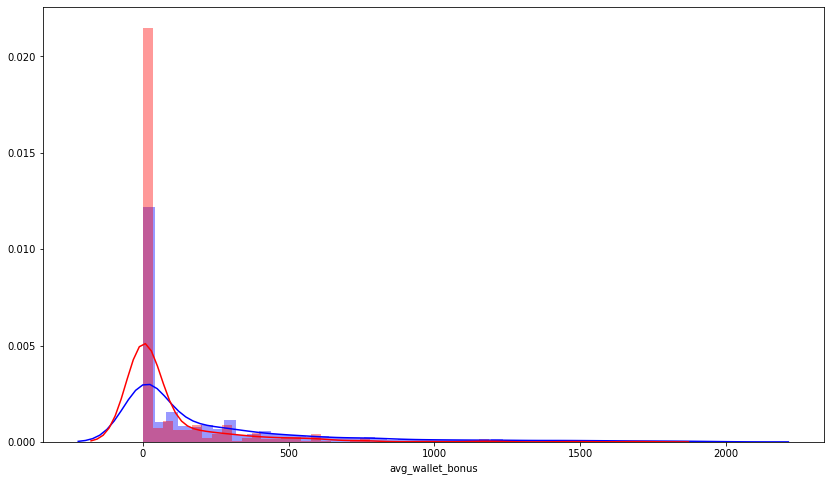

In [31]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['avg_wallet_bonus'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['avg_wallet_bonus'],color = 'red')

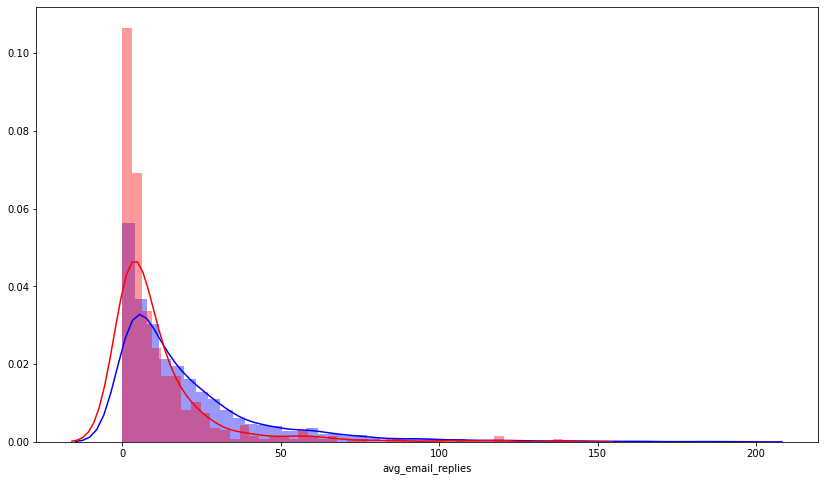

In [32]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['avg_email_replies'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['avg_email_replies'],color = 'red')
## correlated to avg_call_replies and avg_email_replies

We can see some trends from the above graphs, however most of them are fairly inconclusive. Distribution graphs for other columns were also looked at, but since they show similar trends to columns they are correlated with, those have been omitted. 

Now let us look at how the two categorical columns, **account_id** and **business_type** impact the value of **target**




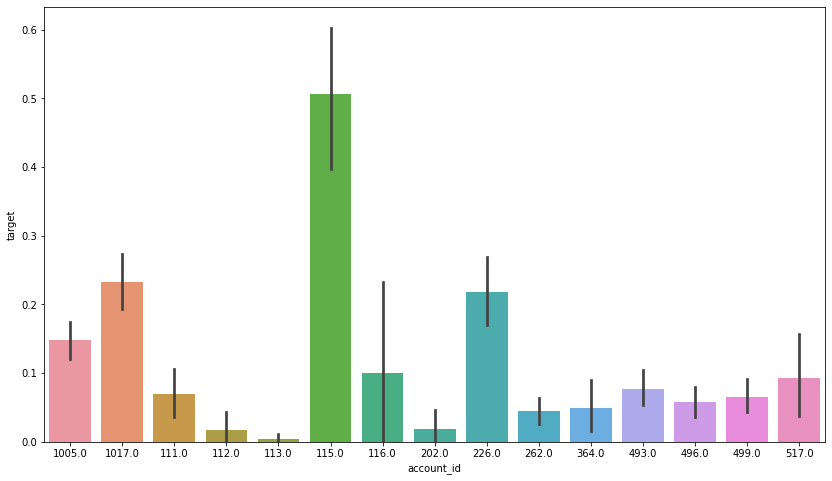

In [33]:
plt.figure(figsize=(14, 8))
sns.barplot(x = 'account_id',
            y = 'target',
            data = data_clean)

Here the Y-axis is **target** and the bars are showing the average value for it for various values of **account_id**. Since **target** can only take the values 0 and 1, this is essentially showing us the proportion of 1s.

We can clearly see that the likelyhood of leaving is highly dependant on the value of **account_id**


Now let us look at **business_type**

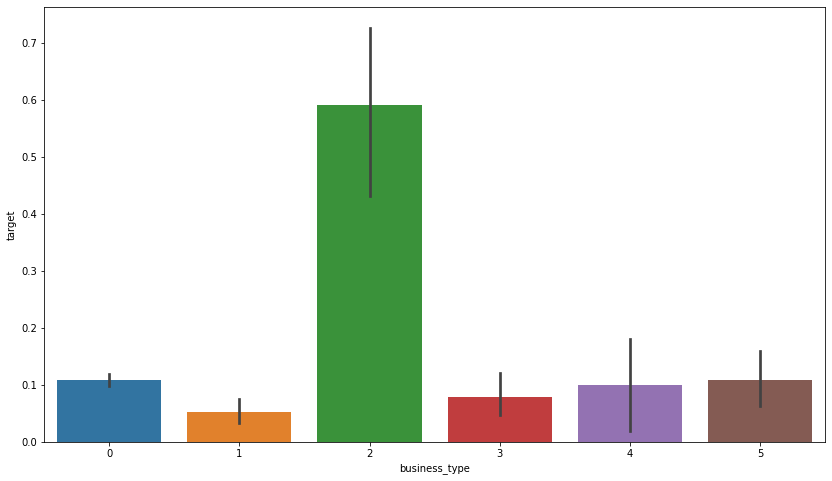

In [34]:
plt.figure(figsize=(14, 8))
sns.barplot(x = 'business_type',
            y = 'target',
            data = data_clean)

We see a similar trend in **business_type**, but with one column having a much higher likelyhood of leaving.

**Feature Engineering**

In feature engineering, we transform our features into new features that may be more useful for the Machine Learning model.

**Note:-** Scaling of features is also a very important part feature engineering, especially for features with high variance. However, we will be using tree based classifiers, and since variance does not impact their performance we do not need to scale our columns. If we were using SVMs or DNNs, scaling of features would have been much more important.

...

We have the columns **total_revenue** and **average_revenue**, clearly these are refering to the same revenue. This revenue must have been collected over a number of number of transactions. We can find the number of these transactions by dividing **total_revenue** with **average_revenue**. And it seems logical, as number of transactions might play a role in whether the customer stays or leaves. Let us create this column.

In [35]:
data_clean['times_revenue_collected'] = data_clean['total_revenue']/data_clean['average_revenue'] 
data_clean['times_revenue_collected'] = data_clean['times_revenue_collected'].fillna(0)
# if the average revenue is 0, the column will filled with a nan value, we can replace those with a 0

We have created the column **times_revenue_collected**. Let us look at how it impacts the value of **target**

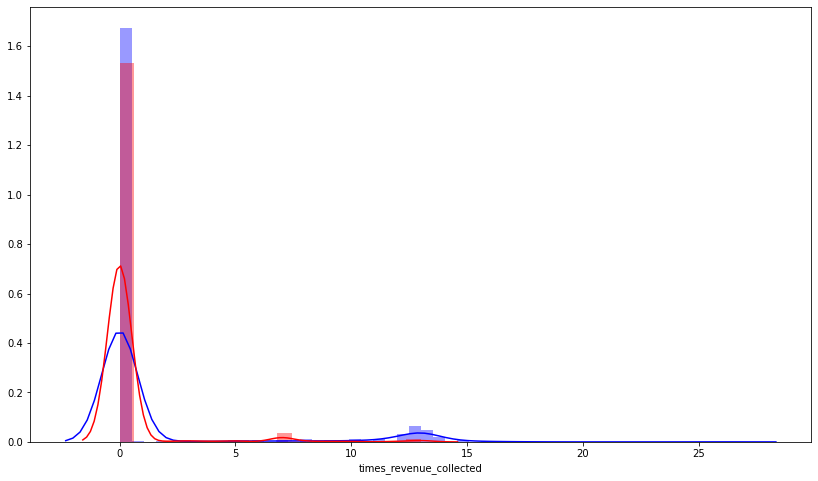

In [36]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['times_revenue_collected'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['times_revenue_collected'],color = 'red')
## correlated to avg_call_replies and avg_email_replies

Although not very conclusive, we can see trends at different places. While lower values of **times_revenue_collected** do not show any trend, between 5 and 10, there is a spike the likelyhood of leaving whereas between 10 and 15, there is a spike in the likelyhood of staying. This may be very useful in classification 

...

Since the columns **avg_email_replies**, **avg_call_replies** and **avg_sms_replies** have high correlation, and all of them convey the same kind of information, which is how many times the user replied, we can combine them into a single column called **avg_replies**

In [37]:
data_clean['avg_replies'] = data_clean['avg_email_replies'] + data_clean['avg_call_replies'] + data_clean['avg_sms_replies']

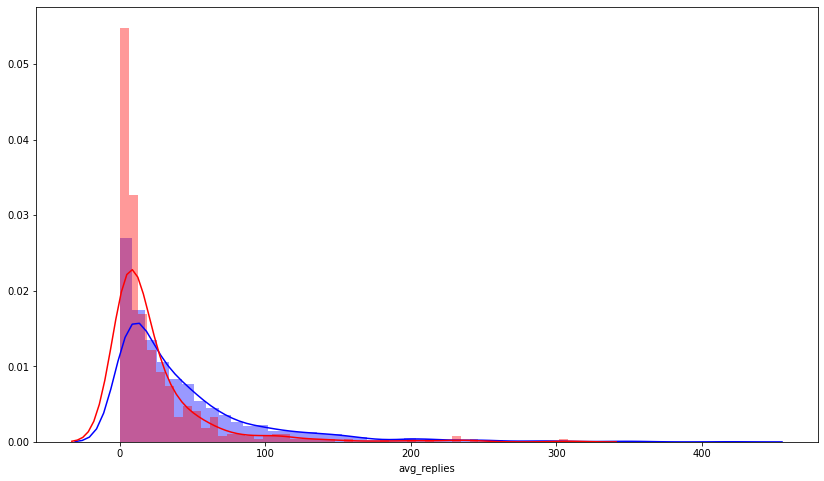

In [38]:
plt.figure(figsize=(14, 8))
sns.distplot(data_clean[data_clean['target'] == 0]['avg_replies'],color = 'blue')
sns.distplot(data_clean[data_clean['target'] == 1]['avg_replies'],color = 'red')
## correlated to avg_call_replies and avg_email_replies

We can see that the graph for **avg_replies** is almost the same as **avg_email_replies** we saw earlier. If information in the columns **avg_email_replies**, **avg_call_replies** and **avg_sms_replies** is relevant to the classification, **avg_replies** can take their place. This would also help in simplification of the model.

Let us look at the statistics of out dataframe with the new columns

In [39]:
data_clean.describe()

,user_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target,times_revenue_collected,avg_replies
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000
mean,4.202303e+09,23.022842,7.403904,9.694879,75.184126,6.656591,2.858424,63.476549,222.014931,72.056345,11.679248,20.117444,21.721198,0.121477,0.106035,1.361385,41.960118
std,6.854673e+09,44.197061,19.665131,5.138716,302.737950,25.459081,3.374389,74.830807,371.308550,109.939384,18.878916,25.009775,27.773673,0.256727,0.307920,3.851807,52.019159
min,4.100390e+05,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.211540e+08,1.000000,1.000000,5.000000,0.000000,0.000000,0.111111,2.307692,0.000000,12.928205,2.428571,4.133929,4.000000,0.000000,0.000000,0.000000,8.500000
50%,7.335224e+08,2.000000,1.142857,11.000000,0.000000,0.000000,2.000000,43.333333,20.000000,37.500000,6.000000,11.500000,12.090909,0.000000,0.000000,0.000000,24.166667
75%,7.295835e+09,31.000000,6.000000,14.000000,0.000000,0.000000,4.230769,98.257576,300.000000,92.080128,13.080128,25.884615,28.250000,0.153846,0.000000,0.000000,53.801282
max,7.356031e+10,354.000000,354.000000,24.000000,3828.331200,236.311429,27.615385,720.000000,1992.000000,1788.181818,199.500000,193.384615,242.230769,4.500000,1.000000,26.000000,424.384615


## Feature Selection, Training, and Testing of the Machine Learning Model

**RandomForestClassifier**

For this problem we have used RandomForestClassifier. There are plenty of reasons for choosing this over SVMs, DNNs and other models, some of them are:-

1. **Unbalanced Dataset** - We saw that only around 10% of the Labels had a value of 1. This can cause gradient based algorithms to get stauck at a local minima where they can get 90% accuracy just by predicting all Labels as 0. We can use Oversampling to make sure this does not happen, but since the real data will always be unbalanced, their bias can cause even worse performance. This is not such a big problem with tree based algorithms.

2. **Lesser tendency to overfit** - Tree based classifiers have a lower tendency of overfitting data than other     models.

3. **Ease of Understanding** - The results produced by Tree based algorithms are generally easier to understand than SVMs and DNNs. This is due to there simplicity, a binary decision is made on each node and can be understood by humans. 

4. **Less feature engineering required** - Every split is made based on one value of a feature at time, therefore scaling and encoding of features is not required.

RandomForestClassifier consists of multiple decision trees which vote for one of the categories, therefore making them more accurate.


**Feature Selection**

We need to select the features that will be useful for our model in its predictions. We can not use all the features since it would increase the complexity of the model and may even impact its performance.

Feature selection is a long process of going back and forth between selection and training of the model. While the features **account_id**, **business_type**, **customer_since_months**,**avg_wallet_bonus** and **max_return_days** showed obvious trends, the same can not be said for other features. After that, it is essentially hit and trial to see whcih of the features give better results.

The steps of trying different combinations of features have omitted and we have arrived at the following features:

In [41]:
feature_columns = [ 'account_id', 'max_return_days',
       'customer_since_months', 'total_revenue',
       'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'times_revenue_collected'
       ]


X = data_clean[feature_columns]
y = data_clean['target']

After that we have also separated the data into features and columns


**Training and Testing**

For training and testing, we will first split the data into training and testing batches. 

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now since the dataset is unbalanced, we will **oversample** the data to make sure the number instances of both classes is equal. 
(For RandomForestClassifier, we can also try to change the hyperparameter **class_weight** to 'balanced', but in this case oversampling gives better results.)  

**Note:-** It is very important that we only oversample the training data after the test-train split. If we oversample before that, many of the instances in the testing data will be repeated. We would get higher accuracy, precision and recall, but this would not be very useful for real world use.  

In [43]:
train_data = X_train

train_data['target'] = y_train


from sklearn.utils import resample

# Separate majority and minority classes
df_majority = train_data[train_data.target==0]
print('Instances of majority class before oversampling : ',len(df_majority))

df_minority = train_data[train_data.target==1]
print('Instances of minority class before oversampling : ',len(df_minority))

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
train_data = pd.concat([df_majority, df_minority_upsampled])
 

print('Instances of majority class after oversampling : ',len(train_data[train_data.target==0]))
print('Instances of minority class after oversampling : ',len(train_data[train_data.target==1]))


X_train_up = train_data[feature_columns]
y_train_up = train_data['target']

Instances of majority class before oversampling :  2959
Instances of minority class before oversampling :  368
Instances of majority class after oversampling :  2959
Instances of minority class after oversampling :  2959


<ipython-input-43-72ed07e97b3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['target'] = y_train


**Parameters for evaluation of the model**

We know that Accuracy is of little value as even a useless classifier can get an accuracy of 90%. Since we want to know which of thet customers are likely to leave, we should focus on our predictions of that. Fot that we will use the metrics **Precision** and **Recall**. Precision is going to tell us how many of those we predicted were going to leave actually did. While Recall tells us how many those who were going to leave did we predict. There is also another parameter called the **F1-Score** which tells us about whether we are sacrificing precision for the sake of recall or vice versa.

Performance of Model on training data :
Accuracy:  0.9820885434268334
Precision:  0.965415986949429
Recall:  1.0
F1-Score:  0.9824037184594954


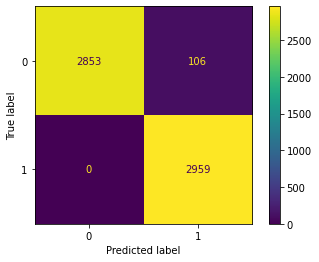

In [44]:
from sklearn.ensemble import RandomForestClassifier

model_1 = RandomForestClassifier(n_estimators=100,random_state=0)

model_1.fit(X_train_up,y_train_up)

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix

pred = model_1.predict(X_train_up)


print('Performance of Model on training data :')

print('Accuracy: ',accuracy_score(y_train_up, pred))
print('Precision: ',precision_score(y_train_up, pred))
print('Recall: ',recall_score(y_train_up, pred))
print('F1-Score: ',f1_score(y_train_up, pred))

plot_confusion_matrix(model_1,X_train_up, y_train_up)

These numbers seem very good, however this was the data the model was trained on. Let us check with testing data

Performance of Model on testing data :
Accuracy:  0.9194711538461539
Precision:  0.5384615384615384
Recall:  0.5753424657534246
F1-Score:  0.5562913907284769


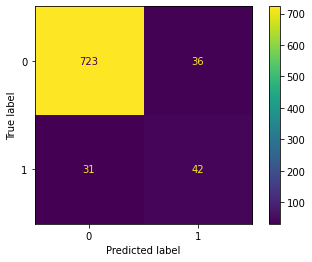

In [45]:
print('Performance of Model on testing data :')

pred = model_1.predict(X_test)

print('Accuracy: ',accuracy_score(y_test, pred))
print('Precision: ',precision_score(y_test, pred))
print('Recall: ',recall_score(y_test, pred))
print('F1-Score: ',f1_score(y_test, pred))

plot_confusion_matrix(model_1,X_test, y_test)

We see there is a drastic decline in the scores. However, this to be expected and is not a cause for concern. 

We are able to find  57.5% of those who will leave, and  53.8% of those we say are going to leave actually do. These numbers might seem low but they are significantly better than picking at random. Also for real world problems like this, very high precision and recall are not possible since sometimes users leave for no apparent reason and sometimes they stay despite having reasons to leave. 


**Hyperparameter Tuning** - Hyperparameter tuning was done on this model using GridSearchCV, but since it did not find any set of parameters with better performance, that step has been omitted. 

## SHAP - SHapley Additive exPlanations

SHAP is a technique used to get insights about how a Model goes about making its predictons. Using this, we can find out how certain values of certain features impact the predictions of the model.

First we import the shap library to do the analysis and load the model.

In [46]:
import shap 


explainer = shap.TreeExplainer(model_1)

shap.initjs()

First let us look at a positive prediction and see how the model decided on it. For this we found the index of a positive prediction.

In [47]:
row_to_show = 29
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
shap_values = explainer.shap_values(data_for_prediction)
print(X_test.iloc[row_to_show])
print('probability of target = 1 :',model_1.predict_proba(data_for_prediction_array)[0,1])

shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction,figsize=1)

account_id                 115.0
max_return_days               16
customer_since_months          2
total_revenue                  0
avg_used_vas_value             0
business_type                  0
avg_wallet_bonus               0
times_revenue_collected        0
Name: 3343, dtype: object
probability of target = 1 : 0.97


We can see that **account_id** being 115 is a very large reason for the model predicting a 1, followed by **customer_since_months** = 2 and **avg_wallet_bonus** = 0. The only factor contributing to lowering the score is **max_return_days** = 16. The rest of the factors have little impact on the value of **target**

All of these factors match what we saw during EDA. Let us look at a negative example for contrast.

In [48]:
row_to_show = 9
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
shap_values = explainer.shap_values(data_for_prediction)
print(X_test.iloc[row_to_show])
print('probability of target = 1 :',model_1.predict_proba(data_for_prediction_array)[0,1])

shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction,figsize=1)

account_id                  1005.0
max_return_days                  1
customer_since_months           13
total_revenue                    0
avg_used_vas_value         207.692
business_type                    0
avg_wallet_bonus                27
times_revenue_collected          0
Name: 2485, dtype: object
probability of target = 1 : 0.24


Here we see **avg_used_vas_value** = 207.7 followed by **customer_since_months** = 13 contributing very significantly to a prediction of 0. The values of **max_return_days** and **avg_wallet_bonus** have small impacts in negative and positive directions respectively. All other factor have comparatively very little impact on the value of **target**.

This also matches what wev saw during EDA. Let us look at Summarise by looking at more general trends

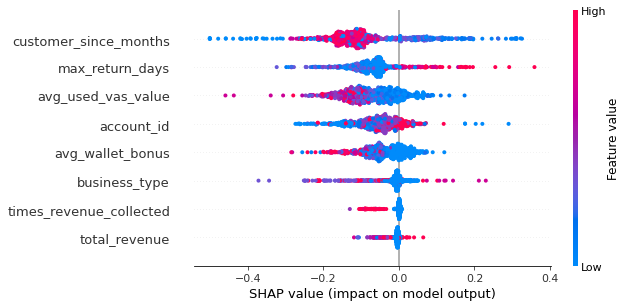

In [49]:
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values[1], X_test)

The summary plot ranks the importance of different features. According to this, **customer_since_months** is the most important feature in determining whether the user will leave or not, followed by **avg_used_vas_value** and **max_return_days**. The features **times_revenue_collected** and **total_revenue** were least impactful.

Some of the conclusions we can make from this are:-

1. Customers which have stayed for a very long time are likely to continue while new customers (typically less than 10 months since joining) are more likely to leave. This does not apply to those who joined 1 month ago.

2. Customers with high **max_return_days** are more likely to leave than those with lower values.

2. Customers with high **avg_used_vas_value** are more likely to stay than those with lower values.

2. Customers with high **avg_wallet_bonus** are more likely to stay than those with lower values.

3. Customers with certain **account_id**s(particularly 115) and certain **business_type**s(particularly 2) are more likely to leave than others.


